In [1]:
#Import required dependencies
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#Convert CSV to DataFrame 
df_gdsp = pd.read_csv('gdsp.csv')

#Data cleaning. 
#Since all columns of West Bengall are not available, we will remove the state from our data 
df_gdsp.drop('West Bengal1' , axis=1, inplace=True)
df_gdsp=df_gdsp.rename(columns = {'Andhra Pradesh ':'Andhra Pradesh'})

In [4]:
def addNad(f):
  
  df_file = pd.read_csv(f, encoding = "ISO-8859-1")

   
  state = ' '.join(((os.path.basename(f)).split('-')[1]).split('_'))
  row_primary = df_file.iloc[[6],2:]/100
  row_primary = row_primary.T
  row_primary.reset_index()

  
  row_primary.columns = [ state]

  row_primary['Items  Description'] = 'Primary'
  
  
  
  row_secondary = df_file.iloc[[10],2:]/100
  row_secondary= row_secondary.T
  row_secondary.reset_index()
  row_secondary.columns = [state]
  row_secondary['Items  Description'] = 'Secondary'

  
  row_tertiary = df_file.iloc[[26],2:]/100
  row_tertiary = row_tertiary.T
  row_tertiary.reset_index()

  row_tertiary.columns = [state]
  row_tertiary['Items  Description'] = 'Tertiary'
  
  row_population = df_file.iloc[[31],2:]
  row_population = row_population.T
  row_population.reset_index()

  row_population.columns = [ state]
  row_population['Items  Description'] = 'Population'
  
  row_percapita = df_file.iloc[[32],2:]/100
  row_percapita = row_percapita.T
  row_percapita.reset_index()

  row_percapita.columns = [ state]
  row_percapita['Items  Description'] = 'Per Capita GDSP'
  
  df_statewise = pd.concat([row_primary, row_secondary, row_tertiary, row_population,row_percapita])
  df_statewise = df_statewise.reset_index()
  df_statewise.columns = ['Duration' , state , 'Items  Description']
  return df_statewise, state

In [5]:
#Merging all statewise data in one dataframe
df_check = pd.DataFrame(columns =['Duration' , 'Items  Description'] )
print(df_check)
for filename in os.listdir('NAD/'):
    filen = 'NAD/' + filename
    result,state = addNad(filen)
    df_check = pd.merge(df_check, result, how='outer')

Empty DataFrame
Columns: [Duration, Items  Description]
Index: []


In [6]:
#Merging the GDSP data with sector wise data 
final_df = pd.merge(df_gdsp, df_check, how='outer')

In [7]:
final_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,1338766.00,654294.00,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


# GDP Analysis of the Indian States

## part 1-A

In [8]:
#Remove data for year 2016-2017
df_1a = df_gdsp[ df_gdsp['Duration'] != '2016-17']

In [9]:
#Calculate the mean average growth rate from year 2013-2016
average_growth = df_1a.iloc[[6,7,8]].mean(axis=0).sort_values()
average_growth

Goa                           6.033333
Meghalaya                     6.953333
Odisha                        9.836667
Sikkim                       10.486667
Jammu & Kashmir              10.900000
Gujarat                      11.126667
Punjab                       11.185000
All_India GDP                11.203333
Maharashtra                  11.260000
Rajasthan                    11.320000
Jharkhand                    11.500000
Uttarakhand                  11.803333
Haryana                      11.846667
Uttar Pradesh                11.940000
Chandigarh                   11.960000
Puducherry                   12.053333
Delhi                        12.160000
Himachal Pradesh             12.280000
Tamil Nadu                   12.336667
Kerala                       12.583333
Madhya Pradesh               12.626667
Assam                        12.650000
Telangana                    12.763333
Bihar                        13.603333
Chhattisgarh                 13.703333
Andaman & Nicobar Islands

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


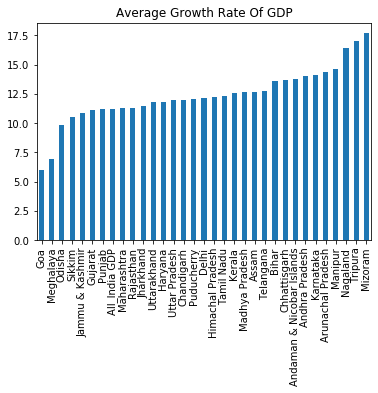

In [10]:
ax = average_growth.plot('bar', title = "Average Growth Rate Of GDP")

In [11]:
average_growth['Chandigarh']
average_growth['All_India GDP']


11.203333333333333

National GDP ~ 11.203333 State with Highest Average growth are from Nort East India.

Top 5 states with fastest growth rate are :

1. Mizoram
2. Tripura
3. Nagaland
4. Manipur
5. Arunachal Pradesh.

The following states are with lowest growth rate :

1. Goa
2. Meghalaya
3. Odisha
4. Sikkim
5. J&K

Curiosity Exercise - My hometown - Chandigarh has an average growth rate of 11.960000 . It's only 6% higher than the average national growth rate.

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'GDP 2015-16 ( in crores)')

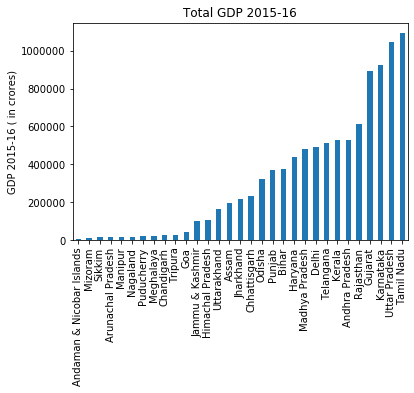

In [12]:
#Plot the total GDP of the states for the year 2015-16
totalgdp = df_1a.iloc[3, 2:].sort_values()[:-2]
ax = totalgdp.plot('bar' , title='Total GDP 2015-16')
ax.set_ylabel('GDP 2015-16 ( in crores)')

In [13]:
#Bottom 5 states : 

totalgdp[:5]

Andaman & Nicobar Islands     5721
Mizoram                      11559
Sikkim                       15209
Arunachal Pradesh            16761
Manipur                      18043
Name: 3, dtype: object

In [14]:
# Top 5 states : 
totalgdp[-5:].sort_values(ascending=False)

Tamil Nadu       1.09256e+06
Uttar Pradesh    1.04337e+06
Karnataka             921788
Gujarat               895027
Rajasthan             612194
Name: 3, dtype: object

## part 1-B

In [15]:
#Select data for year 2014-2015 only. 
df_1b = final_df[ final_df['Duration']=="2014-15"].reset_index().drop('index' , axis=1)

In [16]:
df_1b

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
1,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
2,Primary,2014-15,163037.16,7169.59,53266.97,80199.97,64008.17,NaN,158871.87,80404.24,...,133297.74,91333.54,9422.16,259992.55,18459.72,NaN,NaN,NaN,NaN,NaN
3,Secondary,2014-15,104888.84,2874.89,40330.91,59848.96,82388.86,NaN,330235.38,125614.11,...,328418.92,99240.01,4843.93,255487.24,76428.65,NaN,NaN,NaN,NaN,NaN
4,Tertiary,2014-15,220329.42,6318.44,93071.09,221799.69,75887.78,NaN,302203.77,192265.68,...,533437.88,284714.10,14847.09,459689.59,55879.75,NaN,NaN,NaN,NaN,NaN
5,Population,2014-15,501510.00,14870.00,326780.00,1101240.00,270530.00,NaN,633590.00,266620.00,...,745760.00,367660.00,38350.00,2109940.00,105820.00,NaN,NaN,NaN,NaN,NaN
6,Per Capita GDSP,2014-15,1049.77,1127.18,606.21,339.54,868.60,NaN,1412.63,1640.77,...,1465.03,1390.35,773.58,494.50,1530.76,NaN,NaN,NaN,NaN,NaN


In [17]:
#Excluding all Union territories from our Data. Removing Jammu & Kashmir because sector wise data was not available.  Also removing All India Data since this part requires only comparison within states
df_1b = df_1b.drop(['Chandigarh' , 'Andaman & Nicobar Islands' , 'Delhi' , 'Puducherry', 'Goa'  , 'Jammu & Kashmir' , 'All_India GDP'] , axis=1)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


Text(0, 0.5, 'Per Capita GDSP')

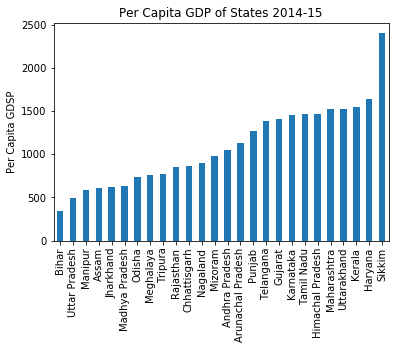

In [18]:
gdsp_percapita = df_1b.iloc[6, 2:].sort_values()
ax = gdsp_percapita.plot('bar' , title= 'Per Capita GDP of States 2014-15')
ax.set_ylabel('Per Capita GDSP')

## Top 5 states based on GDP per capita

In [19]:
gdsp_percapita[-5:].sort_values(ascending=False)

Sikkim         2402.74
Haryana        1640.77
Kerala         1547.78
Uttarakhand    1530.76
Maharashtra    1528.53
Name: 6, dtype: object

## Bottom 5 states based on GDP per capita

In [20]:
gdsp_percapita[:5]

Bihar            339.54
Uttar Pradesh     494.5
Manipur          584.42
Assam            606.21
Jharkhand        620.91
Name: 6, dtype: object

## Ratio of the highest per capita GDP to the lowest per capita GDP

In [21]:
print( 'Ratio = ' , gdsp_percapita[-1]/gdsp_percapita[0])

Ratio =  7.076456382164103


In [22]:
#Calculating contribution from Primary,Secondary and tertiary Sector to Total GDP of the state' 
per_primary = (df_1b.iloc[2,2:]/df_1b.iloc[0, 2:])*100
per_secondary = (df_1b.iloc[3,2:]/df_1b.iloc[0, 2:])*100
per_tertiary = (df_1b.iloc[4,2:]/df_1b.iloc[0, 2:])*100
total_gdp = df_1b.iloc[0,2:]


Text(0, 0.5, 'Percentage Contribution to Total GDP')

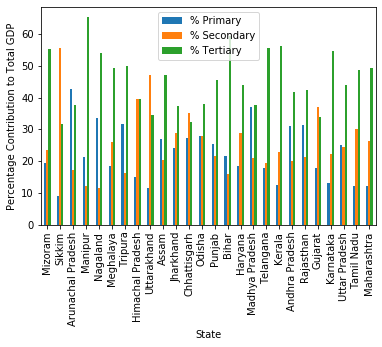

In [23]:
per_distribution = pd.concat([per_primary, per_secondary, per_tertiary,total_gdp], axis=1).reset_index()
per_distribution.columns = ['State' , '% Primary' , '% Secondary' , '% Tertiary', 'Total GDP']
per_distribution = per_distribution.set_index(keys='State')
# Distribution of Contribution from Primary, Secondary and Tertiary to Total GDP
ax = per_distribution.sort_values(by='Total GDP').drop('Total GDP' , axis = 1 ).plot(kind='bar')
ax.set_ylabel('Percentage Contribution to Total GDP')

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


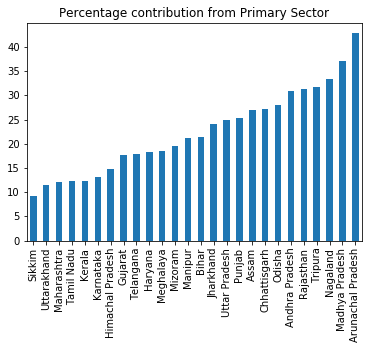

In [24]:
# Percentage of Primary sector contribution to total GDP 
per_primary.sort_values().plot('bar' , title ='Percentage contribution from Primary Sector')


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


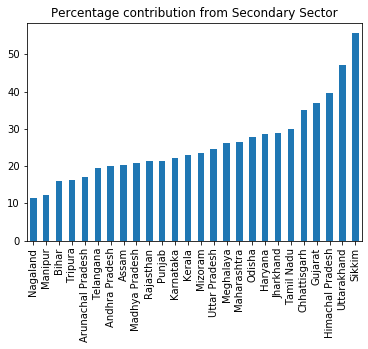

In [25]:
#Percentage of Secondary Sector to total GDP
per_secondary.sort_values().plot('bar', title='Percentage contribution from Secondary Sector')

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


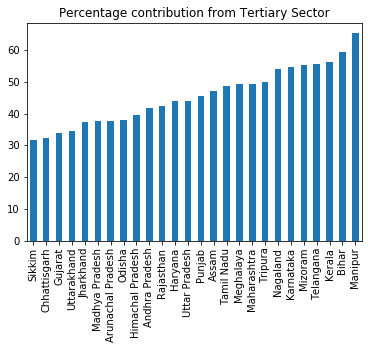

In [26]:
# Percentage of Tertiary Sector to total GDP
per_tertiary.sort_values().plot('bar' , title='Percentage contribution from Tertiary Sector')

## Categorise Based on Quantile Range of 25, 50 and 80

In [27]:
quantile_gdp = df_1b.iloc[[6], 2:].T
quantile_gdp.columns = ['PerCapitaGDP']
quartiles = pd.qcut(quantile_gdp['PerCapitaGDP'],[0,0.2,0.5,0.85,1.0 ], labels=['C4' , 'C3', 'C2','C1' ])
quantile_gdp = quantile_gdp.assign(Quantile=quartiles.values)

In [28]:
quantile_gdp.sort_values(by=['Quantile'])

,PerCapitaGDP,Quantile
Jharkhand,620.91,C4
Assam,606.21,C4
Bihar,339.54,C4
Manipur,584.42,C4
Uttar Pradesh,494.50,C4
Madhya Pradesh,629.89,C4
Meghalaya,762.28,C3
Odisha,739.79,C3
Nagaland,896.07,C3
Rajasthan,848.37,C3


In [29]:
# Merging Statewise Data to a singular Dataframe to examine Subsector contribution to GDP 
df_subsectors = pd.DataFrame(columns =['Item' , '2014-15','State'] )
for filename in os.listdir('NAD/'):
    filen = 'NAD/' + filename
    df_state = pd.read_csv(filen,encoding = "ISO-8859-1")
    df_state = df_state[['Item', '2014-15']]
    
    df_state['State'] = ' '.join(((os.path.basename(filename)).split('-')[1]).split('_'))

    df_subsectors = pd.merge(df_subsectors, df_state, how='outer')

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/reshape/merge.py:1090: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


In [30]:
#Merging the Quantile Labels with statewise Data
df_subsectors['Quantile'] = df_subsectors['State'].map(quantile_gdp['Quantile'])


In [31]:
#Grouping each category together to find each subsector contribution to GDP in each category
subsectors = df_subsectors.groupby(['Quantile', 'Item'] )[['2014-15']].sum()

C1
                                                      2014-15
Item                                                         
Manufacturing                                       16.172614
Agriculture, forestry and fishing                   29.923196
Trade, repair, hotels and restaurants               43.386762
Real estate, ownership of dwelling & profession...  56.681229
Construction                                        67.588402
Other services                                      75.357526
-------
C1 Needs to focus on following sectors
                                     2014-15
Item                                        
Road transport*                   125.284793
Services incidental to transport  125.514274
Air transport                     125.627295
Water transport                   125.650927
Storage                           125.667065
-------
C2
                                                      2014-15
Item                                                         
Manu

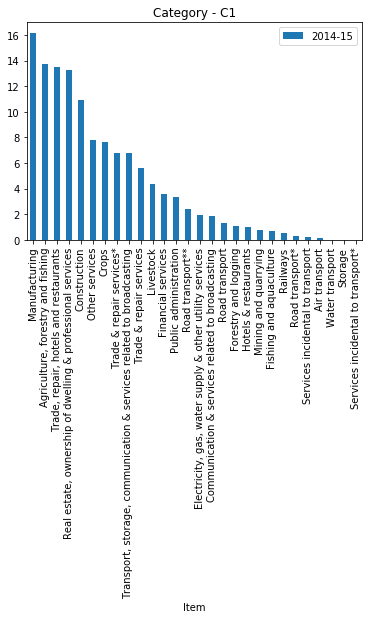

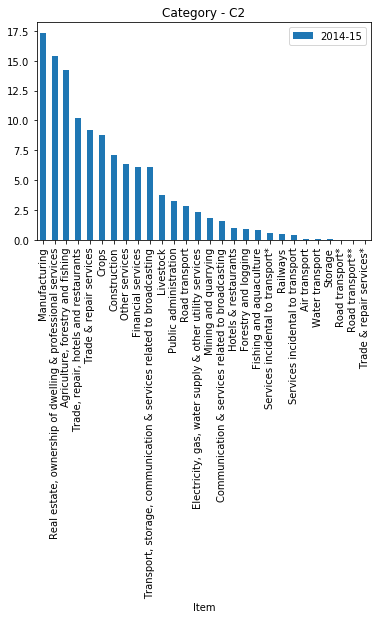

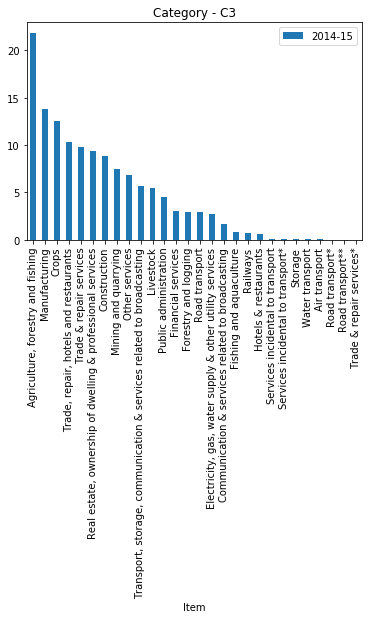

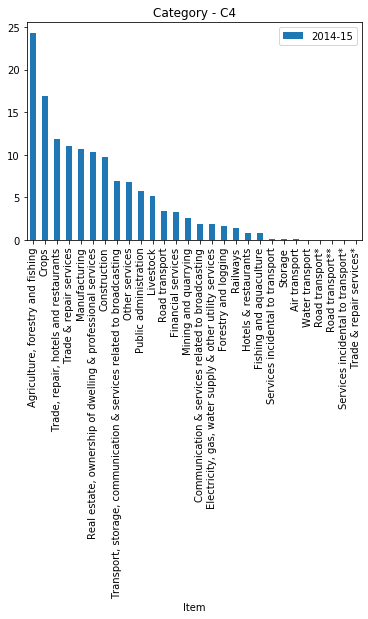

In [32]:
# Top 3/4/5 subsectors of each category 
quantile_labels = ['C1', 'C2', 'C3', 'C4']
for quantile in quantile_labels : 
  df_quantile = subsectors.loc[quantile].sort_values(by='2014-15' , ascending=False)
  df_quantile.loc[:,'2014-15'] = (df_quantile.loc[:,'2014-15'].div(df_quantile.iloc[0]['2014-15']))*100
  df_quantile.drop(['Gross State Domestic Product' , 'Primary', 'Secondary' ,'Tertiary', 'TOTAL GSVA at basic prices' , 'Taxes on Products','Subsidies on products',"Population ('00)",'Per Capita GSDP (Rs.)'] , inplace=True)
  df_quantile.plot(kind='bar', title='Category - ' + quantile)
  
  df_cumulative = df_quantile.cumsum()
  print(quantile)
  print(df_cumulative.loc[df_cumulative['2014-15'] <=80])
  print('-------')
  
  print(quantile + ' Needs to focus on following sectors')
  print(df_cumulative.dropna()[-5:])
  
  
  print('-------')

### How does the GDP distribution of the top states (C1) differ from the others?
The Higher GDP states depend more on manufacturing and there's an equal dependency on Agriculture and Retail business. Whereases, Lower GDP states rely heavily ( > 20%) on Agriculture and Crops.

### Which sub-sectors seem to be correlated with high GDP?
Manufacturing and Real estate, ownership of dwelling & professional services seem to correlate well with high GDP as Both C1 and C2 categories depend the most on these two sectors for GDP.

### Which sub-sectors do the various categories need to focus on?

**C1 Needs to focus on following sectors**

Road transport
Services incidental to transport
Air transport
Water transport
Storage

Recommendation : 
1. Focus on growing manufacturing to at least contribute 20% of total GDP. 
2. Road and Rail Transport seems to lag behind. Since this Category is already skilled in Manufacturing, it can build high quality transportation services.


**C2 Needs to focus on following sectors**

Railways
Services incidental to transport
Air transport
Water transport
Storage

Recommendations :
1. Grow manufacturing to contribute more than 20% of total GDP. 
2. Electricity and other utility services seem lower and can be improved.


**C3 Needs to focus on following sectors**

Services incidental to transport
Storage
Water transport
Air transport

Recommendations : 
1. More than 20% dependency on Agriculture can be risky during the times of draught or natural disasters. Therefore, should focus on growing Manufacturing 
2. C3 is  far behind in Road transportation and can improve it to increase per capita GDP



**C4 Needs to focus on following sectors**

Fishing and aquaculture
Services incidental to transport
Storage
Air transport
Water transport

Recommendations : 
1. Agriculture seems to dominate by contributing ~25% to total GDP. This might be risky during ties of natural disaster. 
2. Focused growth on Manufacturing sector can increase per capita GDP. 
3. There is no significant contribution from Road transportation sector. C4 can focus on growing this sub sector to improve GDP.


# GDP and Education

In [33]:
#Importing Dropout Data
df_dropout = pd.read_csv('dropout.csv')

In [34]:
# Primary 2013-2014 has been mislabeled as 2014-2015 . Correct it first 
df_dropout.rename(columns={'Primary - 2014-2015' : 'Primary - 2013-2014', 'Primary - 2014-2015.1' : 'Primary - 2014-2015'} , inplace=True)

In [35]:
#Let's only analyze 2014-2015 dropout rates 
df_dropout = df_dropout[['Level of Education - State','Primary - 2014-2015' , 'Upper Primary - 2014-2015','Secondary - 2014-2015' , 'Senior Secondary - 2014-2015' ]] 

In [37]:
df_dropout.set_index('Level of Education - State' , inplace=True)
df_dropout.columns = ['Primary','Upper Primary','Secondary','Senior Secondary']

In [38]:
#Merging Dropout Data of each state with the Per Capita Data 
df_merged = pd.merge(df_dropout, quantile_gdp, left_index=True , right_index=True, how='outer')

In [39]:
#Since we removed Union terrorites from the earlier data, the PerCapitaGDP shows as NAN. Let's remove the UT from this dataframe 
df_merged = df_merged[pd.notnull(df_merged['PerCapitaGDP'])]
#Also, we do not have dropout data of Chattisgarh and Uttarakhand. Therefore, we will remove them too
df_merged = df_merged.drop(['Chhattisgarh' , 'Uttarakhand'])
#We can normalise PerCapitaGDP so we can compare the dropouts on a graph. 
df_merged['PerCapitaGDP_norm'] = df_merged['PerCapitaGDP'].apply(lambda x: x*0.01)


In [40]:
df_merged = df_merged.sort_values(by='PerCapitaGDP_norm')
df_merged

,Primary,Upper Primary,Secondary,Senior Secondary,PerCapitaGDP,Quantile,PerCapitaGDP_norm
Bihar,NaN,4.08,25.90,NaN,339.54,C4,3.3954
Uttar Pradesh,8.58,2.70,10.22,2.10,494.50,C4,4.9450
Manipur,9.66,4.20,14.38,NaN,584.42,C4,5.8442
Assam,15.36,10.51,27.06,NaN,606.21,C4,6.0621
Jharkhand,5.48,8.99,24.00,3.41,620.91,C4,6.2091
Madhya Pradesh,6.59,9.20,24.77,NaN,629.89,C4,6.2989
Odisha,2.86,3.81,29.56,NaN,739.79,C3,7.3979
Meghalaya,9.46,6.52,20.52,NaN,762.28,C3,7.6228
Tripura,1.28,1.99,28.42,8.93,773.58,C3,7.7358
Rajasthan,5.02,3.07,13.48,NaN,848.37,C3,8.4837


In [41]:
#To get a clean data, we remove the states that have data missing for any education level 
df_merged = df_merged.dropna()

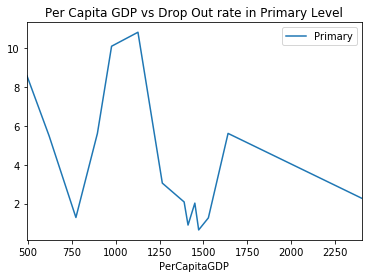

In [42]:
df_merged.plot(x='PerCapitaGDP' , y ='Primary', title = 'Per Capita GDP vs Drop Out rate in Primary Level')

From this plot, we see primary dropout rates is high at very low Per capita GDP. As GDP per capita increases, dropout rates vary considerably. This could be due to difference between population and Total GDP of small states and large states with similar per capita GDP. But as the per capita GDP increases, there is a significant decline in dropout rate

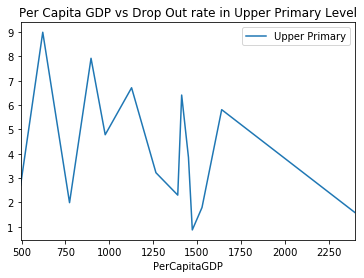

In [43]:
df_merged.plot(x='PerCapitaGDP' , y ='Upper Primary' , title = 'Per Capita GDP vs Drop Out rate in Upper Primary Level')

From this plot, we see upper pirmary dropout rates is low at very low Per capita GDP. this could be due to high drop out at primary level and thus only few students who want to study further continue their studies. Thus a lower level of dropout. As GDP per capita increases, dropout rates vary considerably but as the per capita GDP increases, there is a sharp decline in dropout rate

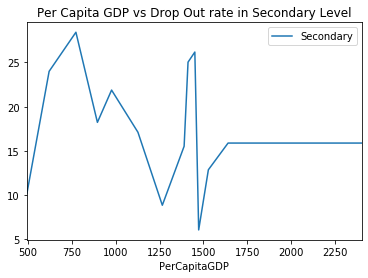

In [44]:
df_merged.plot(x='PerCapitaGDP' , y ='Secondary' , title='Per Capita GDP vs Drop Out rate in Secondary Level')

From this plot, we see secondary level dropout rates is low at very low Per capita GDP similar to upper primary level. Also, after a certain per capita GDP, dropout rate seems to stay stable 

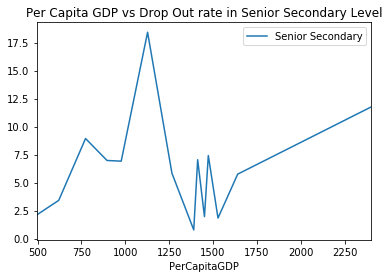

In [45]:
df_merged.plot(x='PerCapitaGDP' , y ='Senior Secondary' , title= 'Per Capita GDP vs Drop Out rate in Senior Secondary Level')

From this plot, we see senior secondary level dropout rates is low at very low Per capita GDP similar to upper primary and secondary level. There is an increase in dropout rate as GDP per capita increases. This might either be due to availability of high paying jobs for students or students move to other countries for higher studies.  

In [46]:
# From the plots we cannot see a direct relationship between dropout and GDP. Let's see if there is any significant correlation between dropouts and per Capita GDP 
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_merged.corr()
corr.style.background_gradient(cmap='coolwarm')

,Primary,Upper Primary,Secondary,Senior Secondary,PerCapitaGDP,PerCapitaGDP_norm
Primary,1,0.479745,-0.0189884,0.341014,-0.461007,-0.461007
Upper Primary,0.479745,1,0.433167,0.165506,-0.391771,-0.391771
Secondary,-0.0189884,0.433167,1,0.0529783,-0.207276,-0.207276
Senior Secondary,0.341014,0.165506,0.0529783,1,0.182255,0.182255
PerCapitaGDP,-0.461007,-0.391771,-0.207276,0.182255,1,1
PerCapitaGDP_norm,-0.461007,-0.391771,-0.207276,0.182255,1,1


### Some key Insights from the dropout data :

1. Dropout rates in Primary, Upper Primary and Secondary levels are negatively correlated with Per Capita GDP. That means, states with higher GDP have lower dropout rate. A key reason could be the availability of low skilled jobs in agriculture and lower income families might withdraw their kids from schools and join them with their agriculture business.
2. A strange observation is positive correlation of Senior secondary dropout rate with Per Capita GDP. This might be due to higher supply of highly skilled jobs like manufacturing and professional service and students might opt for these jobs rather than continue their studies.
3. The increase in Dropout rates with increase in Per capita GDP at senior secondary level could also be due to migration of students to foreign countries for higher education
